## Leukaemia Classification using DL

#### Imports

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import os
import cv2
import shutil
from shutil import copyfile
import random

import keras
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator 
from sklearn.model_selection import train_test_split
from keras.utils import load_img, img_to_array
from tensorflow import keras
from keras.applications.vgg16 import VGG16
from keras.applications import ResNet50
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, MaxPooling2D, BatchNormalization, Activation, Dropout, Flatten, Conv2D, GlobalAveragePooling2D, Embedding, GRU
from keras.models import Model
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from keras.optimizers import Adam

#### Data Preparation

In [3]:
train_dir = '../Dataset/train'
test_dir = '../Dataset/test'

In [4]:
#use generators
#resize image
train_ds = keras.utils.image_dataset_from_directory(
    directory=train_dir,
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (180,180)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory=test_dir,
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (180,180)
)

Found 7108 files belonging to 2 classes.
Found 3553 files belonging to 2 classes.


In [5]:
def process(image, label):
    image = tf.cast(image/255,tf.float32)
    return image, label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [6]:
# function to plote training history
def plot_history(history):
    # store results
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    # plot results
    # accuracy
    plt.figure(figsize=(5, 8))
    plt.rcParams['figure.figsize'] = [8, 4]
    plt.rcParams['font.size'] = 10
    plt.rcParams['axes.grid'] = True
    plt.rcParams['figure.facecolor'] = 'white'
    plt.subplot(2, 1, 1)
    plt.plot(acc, label='Training Accuracy')
    plt.plot(val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.ylabel('Accuracy')
    plt.title(f'\nTraining and Validation Accuracy. \nTrain Accuracy: {str(round(acc[-1],3))}\nValidation Accuracy: {str(round(val_acc[-1],3))}')
    
    # loss
    plt.subplot(2, 1, 2)
    plt.plot(loss, label='Training Loss')
    plt.plot(val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.ylabel('Cross Entropy')
    plt.title(f'Training and Validation Loss. \nTrain Loss: {str(round(loss[-1],3))}\nValidation Loss: {str(round(val_loss[-1],3))}')
    plt.xlabel('epoch')
    plt.tight_layout(pad=3.0)
    plt.show()

#### Approach 1: CNN

In [7]:
# Model Definition
INPUT_SHAPE = (180, 180, 3)

model = keras.Sequential()

model.add(Conv2D(32, (3, 3), input_shape = INPUT_SHAPE))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3), kernel_initializer = 'he_uniform'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3), kernel_initializer = 'he_uniform'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(1))
model.add(Activation('sigmoid'))

In [13]:
opt = tf.keras.optimizers.legacy.Adam(learning_rate=0.0001)
model.compile(loss='binary_crossentropy',
             optimizer=opt,
             metrics=['accuracy'])

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 178, 178, 32)      896       
                                                                 
 activation (Activation)     (None, 178, 178, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 89, 89, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 87, 87, 32)        9248      
                                                                 
 activation_1 (Activation)   (None, 87, 87, 32)        0         
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 43, 43, 32)        0         
 g2D)                                                   

In [15]:
history = model.fit(train_ds,
                  batch_size = 32,
                  verbose=1,
                  epochs=10,
                  validation_data=validation_ds,
                  shuffle=False)

Epoch 1/10


2023-06-28 00:15:50.574347: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] PluggableGraphOptimizer failed: INVALID_ARGUMENT: Unparseable tensorflow.GraphDef proto
2023-06-28 00:15:50.586606: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] PluggableGraphOptimizer failed: INVALID_ARGUMENT: Unparseable tensorflow.GraphDef proto


223/223 [==============================] - ETA: 0s - loss: 0.4518 - accuracy: 0.8087

2023-06-28 00:16:03.194159: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] PluggableGraphOptimizer failed: INVALID_ARGUMENT: Unparseable tensorflow.GraphDef proto
2023-06-28 00:16:03.198725: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] PluggableGraphOptimizer failed: INVALID_ARGUMENT: Unparseable tensorflow.GraphDef proto


223/223 [==============================] - 15s 66ms/step - loss: 0.4518 - accuracy: 0.8087 - val_loss: 0.5206 - val_accuracy: 0.7473
Epoch 2/10
223/223 [==============================] - 15s 65ms/step - loss: 0.4179 - accuracy: 0.8255 - val_loss: 0.5328 - val_accuracy: 0.7518
Epoch 3/10
223/223 [==============================] - 15s 66ms/step - loss: 0.4104 - accuracy: 0.8324 - val_loss: 0.5387 - val_accuracy: 0.7580
Epoch 4/10
223/223 [==============================] - 14s 64ms/step - loss: 0.4016 - accuracy: 0.8341 - val_loss: 0.5321 - val_accuracy: 0.7605
Epoch 5/10
223/223 [==============================] - 15s 65ms/step - loss: 0.3971 - accuracy: 0.8384 - val_loss: 0.5186 - val_accuracy: 0.7667
Epoch 6/10
223/223 [==============================] - 15s 66ms/step - loss: 0.3924 - accuracy: 0.8362 - val_loss: 0.5108 - val_accuracy: 0.7670
Epoch 7/10
223/223 [==============================] - 14s 64ms/step - loss: 0.3801 - accuracy: 0.8481 - val_loss: 0.5027 - val_accuracy: 0.7729
Epo

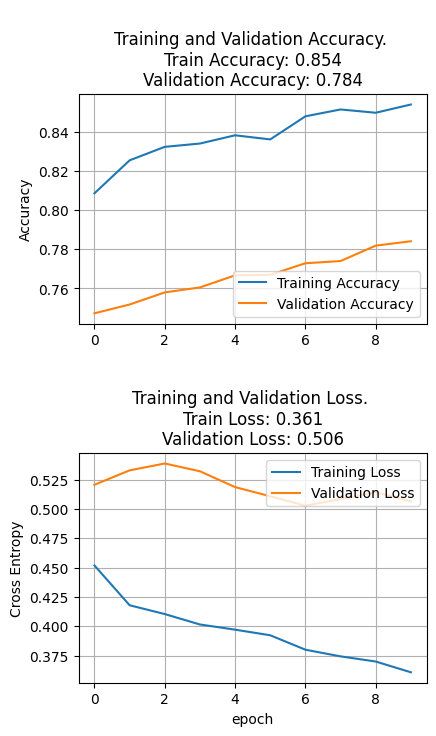

In [16]:
plot_history(history)

In [17]:
_, acc = model.evaluate(validation_ds)
print("Accuracy: ", (acc*100.0), " %")

112/112 [==============================] - 2s 21ms/step - loss: 0.5065 - accuracy: 0.7841
Accuracy:  78.41261029243469  %


#### Approach 2: VGG16

In [18]:
# Load the pre-trained VGG16 model

base_model = VGG16(weights='imagenet', include_top=False, input_shape=(180, 180, 3))
base_model.trainable = False
last_output = base_model.output
x = tf.keras.layers.Flatten()(last_output)  
x = tf.keras.layers.Dense(1024, activation='relu')(x)   
x = tf.keras.layers.Dropout(0.6)(x) 
predictions = Dense(1, activation='sigmoid')(x)  

In [19]:
# Create the final model
vgg16_model = Model(inputs=base_model.input, outputs=predictions)

In [20]:
vgg16_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 180, 180, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 180, 180, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 90, 90, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 90, 90, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 90, 90, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 45, 45, 128)       0     

In [22]:
vgg16_model.compile(optimizer = opt,
            loss = 'binary_crossentropy',
            metrics=['accuracy'])

In [23]:
# Train the model
history = vgg16_model.fit(train_ds,
                       epochs=20,
                       validation_data=validation_ds,
                       verbose=1)

Epoch 1/20


2023-06-28 00:19:16.674956: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] PluggableGraphOptimizer failed: INVALID_ARGUMENT: Unparseable tensorflow.GraphDef proto
2023-06-28 00:19:16.687992: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] PluggableGraphOptimizer failed: INVALID_ARGUMENT: Unparseable tensorflow.GraphDef proto


223/223 [==============================] - ETA: 0s - loss: 0.4952 - accuracy: 0.8113

2023-06-28 00:20:27.793970: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] PluggableGraphOptimizer failed: INVALID_ARGUMENT: Unparseable tensorflow.GraphDef proto
2023-06-28 00:20:27.802193: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] PluggableGraphOptimizer failed: INVALID_ARGUMENT: Unparseable tensorflow.GraphDef proto


223/223 [==============================] - 117s 523ms/step - loss: 0.4952 - accuracy: 0.8113 - val_loss: 0.6141 - val_accuracy: 0.7670
Epoch 2/20
223/223 [==============================] - 107s 478ms/step - loss: 0.4023 - accuracy: 0.8346 - val_loss: 0.5370 - val_accuracy: 0.7599
Epoch 3/20
223/223 [==============================] - 112s 503ms/step - loss: 0.3932 - accuracy: 0.8398 - val_loss: 0.5530 - val_accuracy: 0.7656
Epoch 4/20
223/223 [==============================] - 117s 523ms/step - loss: 0.3839 - accuracy: 0.8409 - val_loss: 0.5643 - val_accuracy: 0.7658
Epoch 5/20
223/223 [==============================] - 124s 555ms/step - loss: 0.3844 - accuracy: 0.8412 - val_loss: 0.5333 - val_accuracy: 0.7650
Epoch 6/20
223/223 [==============================] - 122s 549ms/step - loss: 0.3767 - accuracy: 0.8417 - val_loss: 0.5463 - val_accuracy: 0.7661
Epoch 7/20
223/223 [==============================] - 105s 471ms/step - loss: 0.3752 - accuracy: 0.8426 - val_loss: 0.5616 - val_accura

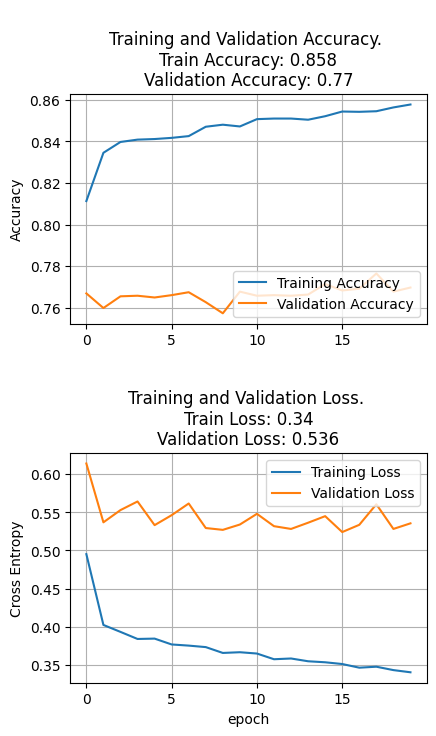

In [24]:
plot_history(history)

In [25]:
_, acc = vgg16_model.evaluate(validation_ds)
print("Accuracy: ", (acc*100.0), " %")

112/112 [==============================] - 31s 273ms/step - loss: 0.5356 - accuracy: 0.7698
Accuracy:  76.97719931602478  %


#### Approach 3: ResNet50

In [26]:
# Load the pre-trained ResNet50 model

base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(180, 180, 3))
base_model.trainable = False
last_output = base_model.output 
x = tf.keras.layers.Flatten()(last_output)  
x = tf.keras.layers.Dense(1024, activation='relu')(x)   
x = tf.keras.layers.Dropout(0.6)(x) 
predictions = Dense(1, activation='sigmoid')(x)  

In [27]:
# create the final model
resnet50_model = Model(inputs=base_model.input, outputs=predictions)
resnet50_model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 180, 180, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 186, 186, 3)          0         ['input_2[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 90, 90, 64)           9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 90, 90, 64)           256       ['conv1_conv[0][0]']          
 on)                                                                                        

In [28]:
resnet50_model.compile(optimizer = tf.keras.optimizers.legacy.Adam(),
            loss = 'binary_crossentropy',
            metrics=['accuracy'])

In [29]:
# Train the model
resnet50_history = model.fit(train_ds,
                       epochs=20,
                       validation_data=validation_ds,
                       verbose=1)

Epoch 1/20
223/223 [==============================] - 15s 66ms/step - loss: 0.3541 - accuracy: 0.8573 - val_loss: 0.4978 - val_accuracy: 0.7872
Epoch 2/20
223/223 [==============================] - 15s 66ms/step - loss: 0.3450 - accuracy: 0.8620 - val_loss: 0.5030 - val_accuracy: 0.7917
Epoch 3/20
223/223 [==============================] - 15s 68ms/step - loss: 0.3470 - accuracy: 0.8609 - val_loss: 0.4814 - val_accuracy: 0.7909
Epoch 4/20
223/223 [==============================] - 15s 66ms/step - loss: 0.3328 - accuracy: 0.8669 - val_loss: 0.4944 - val_accuracy: 0.7920
Epoch 5/20
223/223 [==============================] - 15s 66ms/step - loss: 0.3287 - accuracy: 0.8708 - val_loss: 0.4936 - val_accuracy: 0.7931
Epoch 6/20
223/223 [==============================] - 15s 67ms/step - loss: 0.3243 - accuracy: 0.8708 - val_loss: 0.4867 - val_accuracy: 0.7931
Epoch 7/20
223/223 [==============================] - 16s 70ms/step - loss: 0.3193 - accuracy: 0.8751 - val_loss: 0.5300 - val_accuracy:

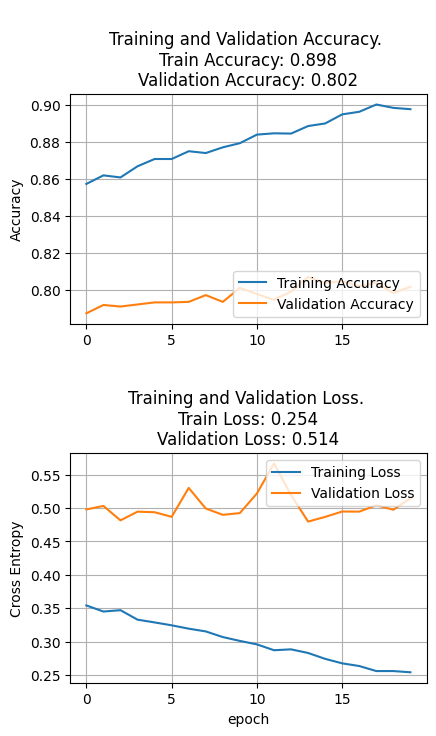

In [30]:
plot_history(resnet50_history)

#### Approach 4: Inception

In [32]:
def create_model(base_model):
    
    x = base_model.output    
    x = GlobalAveragePooling2D()(x)
    x = Dense(128, activation = 'relu')(x)
    x = Dropout(0.4)(x)
    x = Dense(64, activation = 'relu')(x)
    x = Dropout(0.2)(x)
    
    outputs = Dense(1, activation='sigmoid')(x)
    
    model = Model(base_model.inputs, outputs)
    
    return model 

In [33]:
def fit_model(model, base_model, epochs, fine_tune = 0):
    
    early = tf.keras.callbacks.EarlyStopping( patience = 10,
                                              min_delta = 0.001,
                                              restore_best_weights = True)
    
    print("Unfreezing number of layers in base model = ", fine_tune)
    
    if fine_tune > 0:
        base_model.trainable = True
        for layer in base_model.layers[:-fine_tune]:
            layer.trainable = False       
        # small learning rate for fine tuning
        model.compile(optimizer=tf.keras.optimizers.legacy.Adam(1e-5),
                      loss='binary_crossentropy',
                      metrics=['accuracy'])
    else:
        base_model.trainable = False
        model.compile(optimizer=tf.keras.optimizers.legacy.Adam(),
                      loss='binary_crossentropy',
                      metrics=['accuracy'])

    history = model.fit(train_ds,
                        validation_data = validation_ds,
                        epochs = 15,
                        callbacks = [early])
    
    return history

In [34]:
# load the InceptionResNetV2 architecture with imagenet weights as base
inception_base_model = tf.keras.applications.InceptionResNetV2(
                     include_top = False,
                     weights = 'imagenet',
                     input_shape = (180, 180, 3)
                     )

219055592/219055592 [==============================] - 59s 0us/step


In [35]:
inception_model = create_model(inception_base_model)
inception_model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 180, 180, 3)]        0         []                            
                                                                                                  
 conv2d_3 (Conv2D)           (None, 89, 89, 32)           864       ['input_3[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 89, 89, 32)           96        ['conv2d_3[0][0]']            
 Normalization)                                                                                   
                                                                                                  
 activation_5 (Activation)   (None, 89, 89, 32)           0         ['batch_normalization[0]

In [36]:
history = fit_model(inception_model, inception_base_model, epochs = 15)

Unfreezing number of layers in base model =  0
Epoch 1/15


2023-06-28 01:17:13.479624: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] PluggableGraphOptimizer failed: INVALID_ARGUMENT: Unparseable tensorflow.GraphDef proto
2023-06-28 01:17:13.622448: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] PluggableGraphOptimizer failed: INVALID_ARGUMENT: Unparseable tensorflow.GraphDef proto


223/223 [==============================] - ETA: 0s - loss: 0.5149 - accuracy: 0.7708

2023-06-28 01:18:15.830478: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] PluggableGraphOptimizer failed: INVALID_ARGUMENT: Unparseable tensorflow.GraphDef proto
2023-06-28 01:18:15.988644: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] PluggableGraphOptimizer failed: INVALID_ARGUMENT: Unparseable tensorflow.GraphDef proto


223/223 [==============================] - 97s 408ms/step - loss: 0.5149 - accuracy: 0.7708 - val_loss: 0.5485 - val_accuracy: 0.7546
Epoch 2/15
223/223 [==============================] - 81s 364ms/step - loss: 0.4480 - accuracy: 0.8146 - val_loss: 0.5063 - val_accuracy: 0.7622
Epoch 3/15
223/223 [==============================] - 97s 436ms/step - loss: 0.4186 - accuracy: 0.8258 - val_loss: 0.5100 - val_accuracy: 0.7675
Epoch 4/15
223/223 [==============================] - 94s 421ms/step - loss: 0.4028 - accuracy: 0.8329 - val_loss: 0.5082 - val_accuracy: 0.7670
Epoch 5/15
223/223 [==============================] - 93s 418ms/step - loss: 0.4014 - accuracy: 0.8334 - val_loss: 0.5054 - val_accuracy: 0.7675
Epoch 6/15
223/223 [==============================] - 101s 453ms/step - loss: 0.3972 - accuracy: 0.8340 - val_loss: 0.4942 - val_accuracy: 0.7816
Epoch 7/15
223/223 [==============================] - 98s 439ms/step - loss: 0.3839 - accuracy: 0.8431 - val_loss: 0.4847 - val_accuracy: 0.

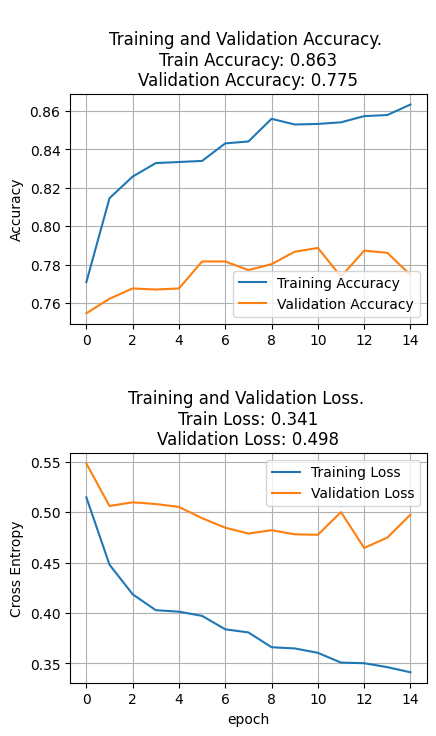

In [37]:
plot_history(history)

#### Approach 5: Xception

In [38]:
# load the xception architecture with imagenet weights as base
xception_base_model = tf.keras.applications.xception.Xception(
                                 include_top = False,
                                 weights = 'imagenet',
                                 input_shape = (180, 180, 3)
                                 )

83683744/83683744 [==============================] - 24s 0us/step


In [39]:
xception_model = create_model(xception_base_model)
xception_model.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_4 (InputLayer)        [(None, 180, 180, 3)]        0         []                            
                                                                                                  
 block1_conv1 (Conv2D)       (None, 89, 89, 32)           864       ['input_4[0][0]']             
                                                                                                  
 block1_conv1_bn (BatchNorm  (None, 89, 89, 32)           128       ['block1_conv1[0][0]']        
 alization)                                                                                       
                                                                                                  
 block1_conv1_act (Activati  (None, 89, 89, 32)           0         ['block1_conv1_bn[0][0]'

In [40]:
history = fit_model(xception_model, xception_base_model, epochs = 15)

Unfreezing number of layers in base model =  0
Epoch 1/15


2023-06-28 01:41:57.950908: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] PluggableGraphOptimizer failed: INVALID_ARGUMENT: Unparseable tensorflow.GraphDef proto
2023-06-28 01:41:57.990418: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] PluggableGraphOptimizer failed: INVALID_ARGUMENT: Unparseable tensorflow.GraphDef proto


223/223 [==============================] - ETA: 0s - loss: 0.4715 - accuracy: 0.7923

2023-06-28 01:42:54.833314: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] PluggableGraphOptimizer failed: INVALID_ARGUMENT: Unparseable tensorflow.GraphDef proto
2023-06-28 01:42:54.869082: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] PluggableGraphOptimizer failed: INVALID_ARGUMENT: Unparseable tensorflow.GraphDef proto


223/223 [==============================] - 86s 375ms/step - loss: 0.4715 - accuracy: 0.7923 - val_loss: 0.5935 - val_accuracy: 0.7557
Epoch 2/15
223/223 [==============================] - 96s 429ms/step - loss: 0.4159 - accuracy: 0.8254 - val_loss: 0.5658 - val_accuracy: 0.7571
Epoch 3/15
223/223 [==============================] - 114s 512ms/step - loss: 0.3900 - accuracy: 0.8419 - val_loss: 0.5290 - val_accuracy: 0.7520
Epoch 4/15
223/223 [==============================] - 101s 455ms/step - loss: 0.3843 - accuracy: 0.8403 - val_loss: 0.5254 - val_accuracy: 0.7689
Epoch 5/15
223/223 [==============================] - 103s 463ms/step - loss: 0.3726 - accuracy: 0.8451 - val_loss: 0.5544 - val_accuracy: 0.7436
Epoch 6/15
223/223 [==============================] - 102s 458ms/step - loss: 0.3603 - accuracy: 0.8530 - val_loss: 0.5221 - val_accuracy: 0.7596
Epoch 7/15
223/223 [==============================] - 102s 459ms/step - loss: 0.3584 - accuracy: 0.8545 - val_loss: 0.5218 - val_accuracy

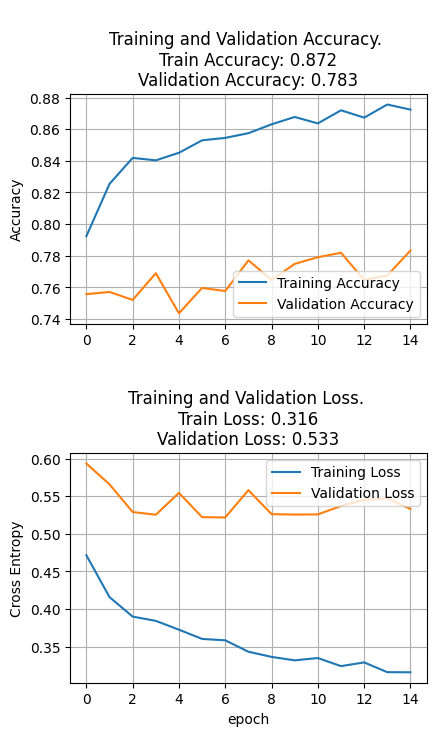

In [41]:
plot_history(history)